**This notebook fits multiple linear regression models to examine the relationship between NSF funding and research quantity and quality.**

**Resources consulted online**:
1. https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html

# Load Packages

In [1]:
# pandas and visualization libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# statsmodels
import statsmodels.api as sm

# Prepare Data for Regression Model Fitting

In [2]:
df = pd.read_csv('regression_data.csv')
df

,email,year,institution,interests,award_year,expiration_year,award_amount,award_title,total_citations,h_index,citation,pub_num,top_cited
0,00t0holtgrav@bsu.edu,2011,Ball State University,['Social Psychology and Language'],2012,2017,0,The Role of Interpersonal Processes in the Int...,10066,46,367.0,2,135.000000
1,00t0holtgrav@bsu.edu,2012,Ball State University,['Social Psychology and Language'],2012,2017,165000,The Role of Interpersonal Processes in the Int...,10066,46,409.0,4,14.666667
2,00t0holtgrav@bsu.edu,2013,Ball State University,['Social Psychology and Language'],2012,2017,165000,The Role of Interpersonal Processes in the Int...,10066,46,534.0,7,281.666667
3,00t0holtgrav@bsu.edu,2014,Ball State University,['Social Psychology and Language'],2012,2017,165000,The Role of Interpersonal Processes in the Int...,10066,46,550.0,8,32.333333
4,00t0holtgrav@bsu.edu,2015,Ball State University,['Social Psychology and Language'],2012,2017,165000,The Role of Interpersonal Processes in the Int...,10066,46,496.0,3,14.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,zulu@msu.edu,2016,Michigan State University,['Environment/Society - natural resources gove...,2014,2015,0,Doctoral Dissertation Research: Decentralizati...,1930,21,117.0,9,29.333333
20636,zulu@msu.edu,2017,Michigan State University,['Environment/Society - natural resources gove...,2014,2015,0,Doctoral Dissertation Research: Decentralizati...,1930,21,151.0,8,5.666667
20637,zulu@msu.edu,2018,Michigan State University,['Environment/Society - natural resources gove...,2014,2015,0,Doctoral Dissertation Research: Decentralizati...,1930,21,165.0,9,39.333333
20638,zulu@msu.edu,2019,Michigan State University,['Environment/Society - natural resources gove...,2014,2015,0,Doctoral Dissertation Research: Decentralizati...,1930,21,177.0,0,0.000000


In [3]:
df_cluster = pd.read_csv(r"../database/author_clustering/cluster_by_author.csv", index_col=0)
df_cluster

,email,tfidf_cluster,w2v_cluster
0,00t0holtgrav@bsu.edu,Linguistics,Cognitive Science
1,a.satpute@northeastern.edu,Cognitive Neuroscience,Neuroscience
2,aabrewer@uci.edu,Cognitive Neuroscience,Environmental Studies
3,aag6@psu.edu,Psychology,Cognitive Science
4,aam72@georgetown.edu,Psychology,Neuroscience
...,...,...,...
2029,zkrizan@iastate.edu,Psychology,Cognitive Science
2030,zoe.wool@rice.edu,Cultural Studies,Environmental Studies
2031,zook@uky.edu,Cultural Studies,Humanities
2032,zulu@msu.edu,Environmental Studies,Environmental Studies


In [4]:
df = pd.merge(df, df_cluster, on="email", how="left")
df

,email,year,institution,interests,award_year,expiration_year,award_amount,award_title,total_citations,h_index,citation,pub_num,top_cited,tfidf_cluster,w2v_cluster
0,00t0holtgrav@bsu.edu,2011,Ball State University,['Social Psychology and Language'],2012,2017,0,The Role of Interpersonal Processes in the Int...,10066,46,367.0,2,135.000000,Linguistics,Cognitive Science
1,00t0holtgrav@bsu.edu,2012,Ball State University,['Social Psychology and Language'],2012,2017,165000,The Role of Interpersonal Processes in the Int...,10066,46,409.0,4,14.666667,Linguistics,Cognitive Science
2,00t0holtgrav@bsu.edu,2013,Ball State University,['Social Psychology and Language'],2012,2017,165000,The Role of Interpersonal Processes in the Int...,10066,46,534.0,7,281.666667,Linguistics,Cognitive Science
3,00t0holtgrav@bsu.edu,2014,Ball State University,['Social Psychology and Language'],2012,2017,165000,The Role of Interpersonal Processes in the Int...,10066,46,550.0,8,32.333333,Linguistics,Cognitive Science
4,00t0holtgrav@bsu.edu,2015,Ball State University,['Social Psychology and Language'],2012,2017,165000,The Role of Interpersonal Processes in the Int...,10066,46,496.0,3,14.000000,Linguistics,Cognitive Science
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,zulu@msu.edu,2016,Michigan State University,['Environment/Society - natural resources gove...,2014,2015,0,Doctoral Dissertation Research: Decentralizati...,1930,21,117.0,9,29.333333,Environmental Studies,Environmental Studies
20636,zulu@msu.edu,2017,Michigan State University,['Environment/Society - natural resources gove...,2014,2015,0,Doctoral Dissertation Research: Decentralizati...,1930,21,151.0,8,5.666667,Environmental Studies,Environmental Studies
20637,zulu@msu.edu,2018,Michigan State University,['Environment/Society - natural resources gove...,2014,2015,0,Doctoral Dissertation Research: Decentralizati...,1930,21,165.0,9,39.333333,Environmental Studies,Environmental Studies
20638,zulu@msu.edu,2019,Michigan State University,['Environment/Society - natural resources gove...,2014,2015,0,Doctoral Dissertation Research: Decentralizati...,1930,21,177.0,0,0.000000,Environmental Studies,Environmental Studies


# Tabulation and Picture of Distribution
In this section, we have plotted the distribution graphs and scatter plots of the main variables to examine their correlations. Finally, we present the descriptive statistics.

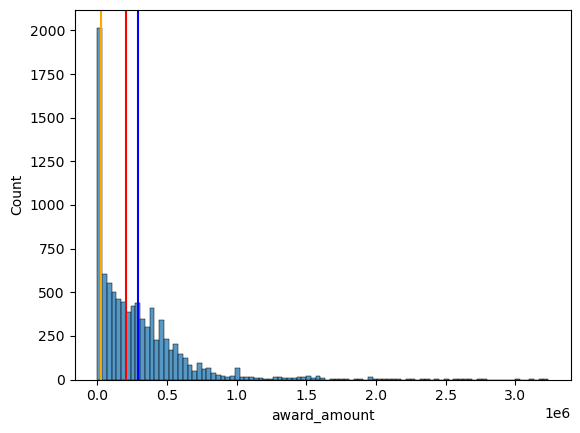

In [5]:
# Filter out data where award_amount is 0
filtered_df = df[df['award_amount'] > 0]

# Use the filtered data to plot a histogram
sns.histplot(data=filtered_df, x="award_amount")

# Add vertical lines for the mean, median, and mode on the histogram
plt.axvline(x=filtered_df['award_amount'].mean(), color='blue', label='Mean')
plt.axvline(x=filtered_df['award_amount'].median(), color='red', label='Median')
plt.axvline(x=filtered_df['award_amount'].mode().values[0], color='orange', label='Mode') # Mode

# Create a new column 'lnaward' which is the log of 'award_amount' + 1
df['lnaward'] = np.log(df['award_amount'] + 1)

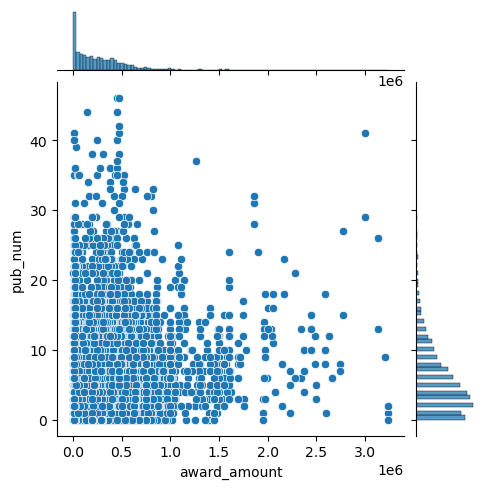

In [6]:
for column in ['pub_num', 'top_cited']:
    mean = filtered_df[column].mean()
    std = filtered_df[column].std()
    # Define the range for outliers
    lower_limit = mean - 3 * std
    upper_limit = mean + 3 * std
    # Keep only the data within (mean - 3*SD, mean + 3*SD) range
    filtered_df = filtered_df[(filtered_df[column] >= lower_limit) & (filtered_df[column] <= upper_limit)]

sns.jointplot(x = "award_amount", y = "pub_num", data = filtered_df, height = 5)

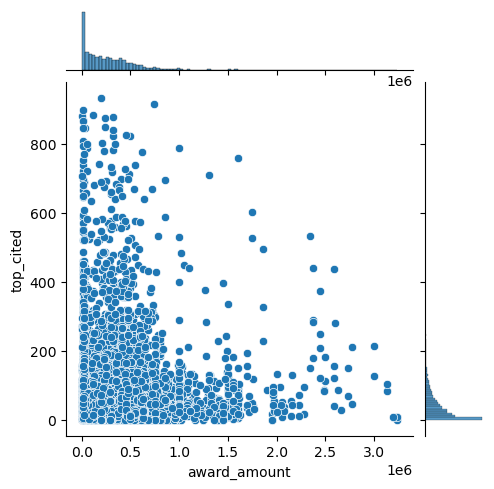

In [7]:
sns.jointplot(x = "award_amount", y = "top_cited", data = filtered_df, height = 5)

Text(33.51562500000001, 0.5, 'publication number')

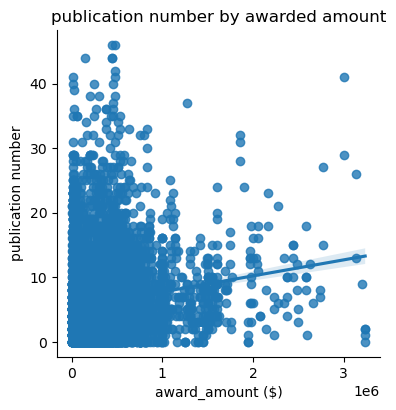

In [8]:
sns.lmplot(data = filtered_df, x = 'award_amount', y = 'pub_num', height = 4, aspect = 1)
plt.title('publication number by awarded amount', size = 12)
plt.xlabel('award_amount ($)', size = 10)
plt.ylabel('publication number', size = 10)

Text(24.640625000000007, 0.5, 'cited number')

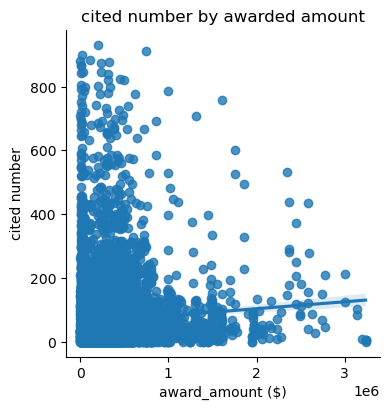

In [9]:
sns.lmplot(data = filtered_df, x = 'award_amount', y = 'top_cited', height = 4, aspect = 1)
plt.title('cited number by awarded amount', size = 12)
plt.xlabel('award_amount ($)', size = 10)
plt.ylabel('cited number', size = 10)

In [10]:
# Get the summary statistics
# Fill missing values in the 'top_cited' column with 0
df['top_cited'] = df['top_cited'].fillna(0)
summary_statistics = df.describe()
print(summary_statistics)

               year    award_year  expiration_year  award_amount  \
count  20640.000000  20640.000000     20640.000000  2.064000e+04   
mean    2015.500000   2014.872093      2018.179264  1.304730e+05   
std        2.872351      2.660993         3.304241  2.703923e+05   
min     2011.000000   2011.000000      2011.000000  0.000000e+00   
25%     2013.000000   2012.000000      2015.000000  0.000000e+00   
50%     2015.500000   2015.000000      2018.000000  0.000000e+00   
75%     2018.000000   2017.000000      2021.000000  1.600000e+05   
max     2020.000000   2020.000000      2026.000000  3.236042e+06   

       total_citations       h_index      citation       pub_num  \
count     20640.000000  20640.000000  20113.000000  20640.000000   
mean       8797.634205     33.613372    476.106200      5.471512   
std       17447.221015     22.731402    965.345139     10.208911   
min           1.000000      1.000000      1.000000      0.000000   
25%        1591.500000     18.000000     81.000

# Regression Part I: Baseline

In this section, we perform baseline regression analyses to explore the relationship between scientific output and funding amount. We conduct three Ordinary Least Squares (OLS) regressions with different specifications to examine both the quantity and quality of research outputs in relation to funding.

- **OLS1**: Utilizes the number of publications as the dependent variable (representing the quantity of scientific output) and the logarithm of funding amount as the independent variable. This model aims to assess how changes in the magnitude of funding are associated with variations in the quantity of research outputs.

- **OLS2**: Employs the average citation count of the top three publications per author as the dependent variable (representing the quality of scientific output) and the logarithm of funding amount as the independent variable. This approach is intended to gauge the impact of funding on the quality of research outputs as reflected by citation metrics.

- **OLS3**: In a variation of the first model, we again use the number of publications as the dependent variable but this time with a binary variable for funding amount as the independent variable. This specification allows us to investigate the effect of having funding (regardless of the amount) versus no funding on the quantity of research outputs.

- **OLS4**: Uses the average citation count of the top three publications per author as the dependent variable and a binary variable for funding amount as the independent variable. Similar to the OLS2, this model examines the influence of the presence or absence of funding on the quality of scientific outputs.


In [11]:
# Setting variables for the regression
Y1 = df['pub_num']
X1 = df[['lnaward', 'citation', 'h_index']]
X1 = X1.replace([np.inf, -np.inf], np.nan)  
X1 = X1.dropna()  
Y1 = Y1[X1.index]  
# Adding a constant to the model
X_const = sm.add_constant(X1)

# Fitting the OLS model
ols_m = sm.OLS(Y1, X_const).fit()
print(ols_m.summary())

                            OLS Regression Results                            
Dep. Variable:                pub_num   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     989.1
Date:                Sat, 02 Mar 2024   Prob (F-statistic):               0.00
Time:                        15:18:09   Log-Likelihood:                -74079.
No. Observations:               20113   AIC:                         1.482e+05
Df Residuals:                   20109   BIC:                         1.482e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0455      0.150     -0.303      0.7

In [12]:
# Setting variables for the regression
Y2 = df['top_cited']
X = df[['lnaward', 'citation', 'h_index']]
Y2 = Y2.replace(np.nan, 0)
X = X.replace([np.inf, -np.inf], np.nan)  
X = X.dropna()  
Y2 = Y2[X.index]  
# Adding a constant to the model
X_const = sm.add_constant(X)

# Fitting the OLS model
ols_m2 = sm.OLS(Y2, X_const).fit()
print(ols_m2.summary())

                            OLS Regression Results                            
Dep. Variable:              top_cited   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     901.8
Date:                Sat, 02 Mar 2024   Prob (F-statistic):               0.00
Time:                        15:18:09   Log-Likelihood:            -1.4232e+05
No. Observations:               20113   AIC:                         2.846e+05
Df Residuals:                   20109   BIC:                         2.847e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.1445      4.460      7.431      0.0

In [13]:
df['dummy_award'] = (df['award_amount'] != 0).astype(int)

# Setting variables for the regression
Y3 = df['pub_num']
X3 = df[['dummy_award', 'citation', 'h_index']]
X3 = X3.replace([np.inf, -np.inf], np.nan)  
X3 = X3.dropna()  
Y3 = Y3[X.index]  
# Adding a constant to the model
X_const = sm.add_constant(X3)

# Fitting the OLS model
ols_m3 = sm.OLS(Y3, X_const).fit()
print(ols_m3.summary())

                            OLS Regression Results                            
Dep. Variable:                pub_num   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     988.8
Date:                Sat, 02 Mar 2024   Prob (F-statistic):               0.00
Time:                        15:18:09   Log-Likelihood:                -74079.
No. Observations:               20113   AIC:                         1.482e+05
Df Residuals:                   20109   BIC:                         1.482e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0590      0.151     -0.392      

In [14]:
# Setting variables for the regression
Y4 = df['top_cited']
Y4 = Y4.replace(np.nan, 0)
X4 = df[['dummy_award', 'citation', 'h_index']]
X4 = X4.replace([np.inf, -np.inf], np.nan)  
X4 = X4.dropna()  
Y4 = Y4[X.index]  
# Adding a constant to the model
X_const = sm.add_constant(X4)

# Fitting the OLS model
ols_m4 = sm.OLS(Y4, X_const).fit()
print(ols_m4.summary())

                            OLS Regression Results                            
Dep. Variable:              top_cited   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     901.7
Date:                Sat, 02 Mar 2024   Prob (F-statistic):               0.00
Time:                        15:18:09   Log-Likelihood:            -1.4232e+05
No. Observations:               20113   AIC:                         2.846e+05
Df Residuals:                   20109   BIC:                         2.847e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          33.4035      4.484      7.450      

# Regression Part II: Control Time Fixed Effect
In this part, the four OLS regressions (OLS5-OLS8) are similar to the previous ones, with the only difference being that we control for the time fixed effect in each OLS. This adjustment helps to mitigate the bias from omitted variables.

In [15]:
# Create dummy variables for the year, set drop_first=True to avoid multicollinearity
year_dummies = pd.get_dummies(df['year'], prefix='d', drop_first=False)

# Select nine dummy variables that do not include 2020
year_dummies = year_dummies.iloc[:, :-1]  # Assuming the last column is d2020

# Set dependent variable Y5 and independent variables X5
Y5 = df['pub_num']
X5 = df[['lnaward', 'citation', 'h_index']]

# Check and handle NaN values
X5 = X5.replace([np.inf, -np.inf], np.nan).dropna()
Y5 = Y5[X5.index]

# Add the dummy variables to X5
X5 = pd.concat([X5, year_dummies.loc[X5.index]], axis=1)

# Add a constant to X5 to fit the intercept
X5_const = sm.add_constant(X5)

# Fit the OLS model
ols_m5 = sm.OLS(Y5, X5_const).fit()

# Print the model summary
print(ols_m5.summary())

                            OLS Regression Results                            
Dep. Variable:                pub_num   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     249.3
Date:                Sat, 02 Mar 2024   Prob (F-statistic):               0.00
Time:                        15:18:09   Log-Likelihood:                -74068.
No. Observations:               20113   AIC:                         1.482e+05
Df Residuals:                   20100   BIC:                         1.483e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2459      0.250     -0.983      0.3

In [16]:
# Create dummy variables for the year, set drop_first=True to avoid multicollinearity
year_dummies = pd.get_dummies(df['year'], prefix='d', drop_first=False)

# Select nine dummy variables that do not include 2020
year_dummies = year_dummies.iloc[:, :-1]  # Assuming the last column is d2020

# Set dependent variable Y6 and independent variables X6
Y6 = df['top_cited']
X6 = df[['lnaward', 'citation', 'h_index']]
Y6 = Y6.replace(np.nan, 0)
# Check and handle NaN values
X6 = X6.replace([np.inf, -np.inf], np.nan).dropna()
Y6 = Y6[X6.index]

# Add the dummy variables to X6
X6 = pd.concat([X6, year_dummies.loc[X6.index]], axis=1)

# Add a constant to X6 to fit the intercept
X6_const = sm.add_constant(X6)

# Fit the OLS model
ols_m6 = sm.OLS(Y6, X6_const).fit()

# Print the model summary
print(ols_m6.summary())

                            OLS Regression Results                            
Dep. Variable:              top_cited   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     255.9
Date:                Sat, 02 Mar 2024   Prob (F-statistic):               0.00
Time:                        15:18:09   Log-Likelihood:            -1.4216e+05
No. Observations:               20113   AIC:                         2.843e+05
Df Residuals:                   20100   BIC:                         2.844e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.2970      7.385     -2.342      0.0

In [17]:
# Create dummy variables for the year, set drop_first=True to avoid multicollinearity
year_dummies = pd.get_dummies(df['year'], prefix='d', drop_first=False)

# Select nine dummy variables that do not include 2020
year_dummies = year_dummies.iloc[:, :-1]  # Assuming the last column is d2020

# Set dependent variable Y7 and independent variables X7
Y7 = df['pub_num']
X7 = df[['dummy_award', 'citation', 'h_index']]

# Check and handle NaN values
X7 = X7.replace([np.inf, -np.inf], np.nan).dropna()
Y7 = Y7[X7.index]

# Add the dummy variables to X7
X7 = pd.concat([X7, year_dummies.loc[X7.index]], axis=1)

# Add a constant to X5 to fit the intercept
X7_const = sm.add_constant(X7)

# Fit the OLS model
ols_m7 = sm.OLS(Y7, X7_const).fit()

# Print the model summary
print(ols_m7.summary())

                            OLS Regression Results                            
Dep. Variable:                pub_num   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     249.1
Date:                Sat, 02 Mar 2024   Prob (F-statistic):               0.00
Time:                        15:18:09   Log-Likelihood:                -74069.
No. Observations:               20113   AIC:                         1.482e+05
Df Residuals:                   20100   BIC:                         1.483e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.2403      0.250     -0.961      

In [18]:
# Create dummy variables for the year, set drop_first=True to avoid multicollinearity
year_dummies = pd.get_dummies(df['year'], prefix='d', drop_first=False)

# Select nine dummy variables that do not include 2020
year_dummies = year_dummies.iloc[:, :-1]  # Assuming the last column is d2020

# Set dependent variable Y8 and independent variables X8
Y8 = df['top_cited']
Y8 = Y8.replace(np.nan, 0)
X8 = df[['dummy_award', 'citation', 'h_index']]

# Check and handle NaN values
X8 = X8.replace([np.inf, -np.inf], np.nan).dropna()
Y8 = Y8[X8.index]

# Add the dummy variables to X7
X8 = pd.concat([X8, year_dummies.loc[X8.index]], axis=1)

# Add a constant to X5 to fit the intercept
X8_const = sm.add_constant(X8)

# Fit the OLS model
ols_m8 = sm.OLS(Y8, X8_const).fit()

# Print the model summary
print(ols_m8.summary())

                            OLS Regression Results                            
Dep. Variable:              top_cited   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     255.9
Date:                Sat, 02 Mar 2024   Prob (F-statistic):               0.00
Time:                        15:18:10   Log-Likelihood:            -1.4216e+05
No. Observations:               20113   AIC:                         2.843e+05
Df Residuals:                   20100   BIC:                         2.844e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -16.7421      7.387     -2.266      

# Regression Part III: Control Subfield Fixed Effect

This section includes eight OLS models (OLS9-OLS16) which are similar to those in Part II, with the unique distinction that we control for subfield fixed effects in each OLS. This adjustment is aimed at controlling for the bias from variables omitted that vary across different subfields. OLS9-OLS12 and OLS13-OLS16 represent two different classification methods, for more details, please refer to the cluster section.

In [19]:
# Create dummy variables for clusters, set drop_first=True to avoid multicollinearity
cluster_dummies1 = pd.get_dummies(df['tfidf_cluster'], prefix='d', drop_first=False)
cluster_dummies2 = pd.get_dummies(df['w2v_cluster'], prefix='d', drop_first=False)

cluster_dummies1 = cluster_dummies1.iloc[:, :-1]  
cluster_dummies2 = cluster_dummies2.iloc[:, :-1]


In [20]:
# Set dependent variable Y9 and independent variables X9
Y9 = df['pub_num']
X9 = df[['lnaward', 'citation', 'h_index']]

# Check and handle NaN values
X9 = X9.replace([np.inf, -np.inf], np.nan).dropna()
Y9 = Y9[X9.index]

# Add the dummy variables to X9
X9 = pd.concat([X9, year_dummies.loc[X9.index], cluster_dummies1.loc[X9.index]], axis=1)

# Add a constant to X9 to fit the intercept
X9_const = sm.add_constant(X9)

# Fit the OLS model
ols_m9 = sm.OLS(Y9, X9_const).fit()

# Print the model summary
print(ols_m9.summary())

                            OLS Regression Results                            
Dep. Variable:                pub_num   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sat, 02 Mar 2024   Prob (F-statistic):               0.00
Time:                        15:18:10   Log-Likelihood:                -74017.
No. Observations:               20113   AIC:                         1.481e+05
Df Residuals:                   20093   BIC:                         1.482e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [21]:
Y10 = df['top_cited']
Y10 = Y10.replace(np.nan, 0)
X10 = df[['lnaward', 'citation', 'h_index']]

# Check and handle NaN values
X10 = X10.replace([np.inf, -np.inf], np.nan).dropna()
Y10 = Y10[X10.index]

X10 = pd.concat([X10, year_dummies.loc[X10.index], cluster_dummies1.loc[X10.index]], axis=1)

X10_const = sm.add_constant(X10)

# Fit the OLS model
ols_m10 = sm.OLS(Y10, X10_const).fit()

# Print the model summary
print(ols_m10.summary())

                            OLS Regression Results                            
Dep. Variable:              top_cited   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     163.2
Date:                Sat, 02 Mar 2024   Prob (F-statistic):               0.00
Time:                        15:18:10   Log-Likelihood:            -1.4214e+05
No. Observations:               20113   AIC:                         2.843e+05
Df Residuals:                   20093   BIC:                         2.845e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [22]:
Y11 = df['pub_num']
X11 = df[['dummy_award', 'citation', 'h_index']]

# Check and handle NaN values
X11 = X11.replace([np.inf, -np.inf], np.nan).dropna()
Y11 = Y11[X11.index]

# Add the dummy variables to X7
X11 = pd.concat([X11, year_dummies.loc[X11.index], cluster_dummies1.loc[X11.index]], axis=1)

# Add a constant to X5 to fit the intercept
X11_const = sm.add_constant(X11)

# Fit the OLS model
ols_m11 = sm.OLS(Y11, X11_const).fit()

# Print the model summary
print(ols_m11.summary())

                            OLS Regression Results                            
Dep. Variable:                pub_num   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     163.5
Date:                Sat, 02 Mar 2024   Prob (F-statistic):               0.00
Time:                        15:18:10   Log-Likelihood:                -74018.
No. Observations:               20113   AIC:                         1.481e+05
Df Residuals:                   20093   BIC:                         1.482e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [23]:
# Set dependent variable Y7 and independent variables X7
Y12 = df['top_cited']
X12 = df[['dummy_award', 'citation', 'h_index']]

# Check and handle NaN values
X12 = X12.replace([np.inf, -np.inf], np.nan).dropna()
Y12 = Y12[X12.index]

# Add the dummy variables to X7
X12 = pd.concat([X12, year_dummies.loc[X12.index], cluster_dummies1.loc[X12.index]], axis=1)

# Add a constant to X5 to fit the intercept
X12_const = sm.add_constant(X12)

# Fit the OLS model
ols_m12 = sm.OLS(Y12, X12_const).fit()

# Print the model summary
print(ols_m12.summary())

                            OLS Regression Results                            
Dep. Variable:              top_cited   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     163.2
Date:                Sat, 02 Mar 2024   Prob (F-statistic):               0.00
Time:                        15:18:10   Log-Likelihood:            -1.4214e+05
No. Observations:               20113   AIC:                         2.843e+05
Df Residuals:                   20093   BIC:                         2.845e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [24]:
Y13 = df['pub_num']
X13 = df[['lnaward', 'citation', 'h_index']]

# Check and handle NaN values
X13 = X13.replace([np.inf, -np.inf], np.nan).dropna()
Y13 = Y13[X13.index]

X13 = pd.concat([X13, year_dummies.loc[X13.index], cluster_dummies2.loc[X13.index]], axis=1)

X13_const = sm.add_constant(X13)

# Fit the OLS model
ols_m13 = sm.OLS(Y13, X13_const).fit()

# Print the model summary
print(ols_m13.summary())

                            OLS Regression Results                            
Dep. Variable:                pub_num   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     181.7
Date:                Sat, 02 Mar 2024   Prob (F-statistic):               0.00
Time:                        15:18:11   Log-Likelihood:                -74025.
No. Observations:               20113   AIC:                         1.481e+05
Df Residuals:                   20095   BIC:                         1.482e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [25]:
Y14 = df['top_cited']
X14 = df[['lnaward', 'citation', 'h_index']]

# Check and handle NaN values
X14 = X14.replace([np.inf, -np.inf], np.nan).dropna()
Y14 = Y14[X14.index]

X14 = pd.concat([X14, year_dummies.loc[X14.index], cluster_dummies2.loc[X14.index]], axis=1)

X14_const = sm.add_constant(X14)

# Fit the OLS model
ols_m14 = sm.OLS(Y14, X14_const).fit()

# Print the model summary
print(ols_m14.summary())

                            OLS Regression Results                            
Dep. Variable:              top_cited   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     181.6
Date:                Sat, 02 Mar 2024   Prob (F-statistic):               0.00
Time:                        15:18:11   Log-Likelihood:            -1.4215e+05
No. Observations:               20113   AIC:                         2.843e+05
Df Residuals:                   20095   BIC:                         2.845e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [26]:
Y15 = df['pub_num']
X15 = df[['dummy_award', 'citation', 'h_index']]

# Check and handle NaN values
X15 = X15.replace([np.inf, -np.inf], np.nan).dropna()
Y15 = Y15[X15.index]

X15 = pd.concat([X15, year_dummies.loc[X15.index], cluster_dummies2.loc[X15.index]], axis=1)

X15_const = sm.add_constant(X15)

# Fit the OLS model
ols_m15 = sm.OLS(Y15, X15_const).fit()

# Print the model summary
print(ols_m15.summary())

                            OLS Regression Results                            
Dep. Variable:                pub_num   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     181.4
Date:                Sat, 02 Mar 2024   Prob (F-statistic):               0.00
Time:                        15:18:11   Log-Likelihood:                -74028.
No. Observations:               20113   AIC:                         1.481e+05
Df Residuals:                   20095   BIC:                         1.482e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [27]:
Y16 = df['top_cited']
X16 = df[['dummy_award', 'citation', 'h_index']]

# Check and handle NaN values
X16 = X16.replace([np.inf, -np.inf], np.nan).dropna()
Y16 = Y16[X16.index]

X16 = pd.concat([X16, year_dummies.loc[X16.index], cluster_dummies2.loc[X16.index]], axis=1)

X16_const = sm.add_constant(X16)

# Fit the OLS model
ols_m16 = sm.OLS(Y16, X16_const).fit()

# Print the model summary
print(ols_m16.summary())

                            OLS Regression Results                            
Dep. Variable:              top_cited   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     181.6
Date:                Sat, 02 Mar 2024   Prob (F-statistic):               0.00
Time:                        15:18:11   Log-Likelihood:            -1.4215e+05
No. Observations:               20113   AIC:                         2.843e+05
Df Residuals:                   20095   BIC:                         2.845e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

# Part IV: Grouped Regression Model

Parts I-III have been addressing our Research Question 1, which asks whether funding has a positive or negative impact on the quantity and quality of scientific output. In this section, Part IV, we conduct grouped regressions based on our cluster results to answer Research Question 3: Which subfield is more significantly affected by funding? By comparing the regression coefficients across different groups, we can draw conclusions.

In [28]:
X17 = df[['lnaward', 'citation', 'h_index']]

X17 = pd.concat([X17, year_dummies.loc[X17.index]], axis=1)
X17_const = sm.add_constant(X17)


# Perform regression for each group in tfidf_cluster
tfidf_cluster_results = {}
for cluster in df['tfidf_cluster'].unique():
    cluster_df = df[df['tfidf_cluster'] == cluster]
    Y = cluster_df['pub_num']
    X_cluster = X17.loc[cluster_df.index]
    X_cluster = X_cluster.replace([np.inf, -np.inf], np.nan).dropna()
    Y = Y[X_cluster.index]
    try:
        model = sm.OLS(Y, X_cluster).fit()
    except:
        continue
    tfidf_cluster_results[cluster] = model

for cluster, result in tfidf_cluster_results.items():
    print(f"tfidf_cluster {cluster} Regression Summary:")
    print(result.summary())


tfidf_cluster Linguistics Regression Summary:
                                 OLS Regression Results                                
Dep. Variable:                pub_num   R-squared (uncentered):                   0.569
Model:                            OLS   Adj. R-squared (uncentered):              0.566
Method:                 Least Squares   F-statistic:                              232.0
Date:                Sat, 02 Mar 2024   Prob (F-statistic):                        0.00
Time:                        15:18:12   Log-Likelihood:                         -6387.3
No. Observations:                2123   AIC:                                  1.280e+04
Df Residuals:                    2111   BIC:                                  1.287e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.

In [29]:
# Perform regression for each group in w2v_cluster
tfidf_cluster_results = {}
for cluster in df['w2v_cluster'].unique():
    cluster_df = df[df['w2v_cluster'] == cluster]
    Y = cluster_df['pub_num']
    X_cluster = X17.loc[cluster_df.index]
    X_cluster = X_cluster.replace([np.inf, -np.inf], np.nan).dropna()
    Y = Y[X_cluster.index]
    try:
        model = sm.OLS(Y, X_cluster).fit()
    except:
        continue
    tfidf_cluster_results[cluster] = model


for cluster, result in tfidf_cluster_results.items():
    print(f"w2v_cluster {cluster} Regression Summary:")
    print(result.summary())


w2v_cluster Cognitive Science Regression Summary:
                                 OLS Regression Results                                
Dep. Variable:                pub_num   R-squared (uncentered):                   0.692
Model:                            OLS   Adj. R-squared (uncentered):              0.691
Method:                 Least Squares   F-statistic:                              602.4
Date:                Sat, 02 Mar 2024   Prob (F-statistic):                        0.00
Time:                        15:18:12   Log-Likelihood:                         -9317.4
No. Observations:                3226   AIC:                                  1.866e+04
Df Residuals:                    3214   BIC:                                  1.873e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025    